In [8]:
from utils import *
from external_packages import *

In [2]:
sec_stackset=pd.read_csv(cleaned_data_folder+'/final_stackset.csv')
sec_stackset.drop(['0'],axis=1,inplace=True)

In [3]:
numerical =['Year','Month','Day','Hour','Minute','USHoliday',
           'CAHoliday','UKHoliday','WeekDay','log_InteractionTime','alexa_ranking_ca','alexa_ranking_com','Visits']
categorical=['Website','Brand','colour','BannerWidth','BannerHeight']

for k,scaler_f in scalers.items():
    ter_stackset=sec_stackset.copy()
    ter_stackset=ter_stackset.drop(['InteractionTime','TimeStamp'],axis=1)
    scaler=scaler_f()
    ter_stackset[numerical]=scaler.fit_transform(sec_stackset[numerical])
    final_stackset=pd.DataFrame()
    
    temp=pd.DataFrame()

    for target in categorical:
        dummy=pd.get_dummies(ter_stackset[target])
        temp=pd.concat([temp,dummy],axis=1)


    final_stackset = pd.concat([ter_stackset.drop(categorical,axis=1),temp],axis=1)
    final_stackset.to_csv(processed_data_folder+'/final_stackset_'+str(k)+'.csv')

In [3]:
scalers=['MinMaxScaler','MaxAbsScaler','StandardScaler','RobustScaler','QuantileTransformer','PowerTransformer']
scaledData=dict()
train_test_splits=[]
for scaler in scalers:
    
    final_stackset=pd.read_csv(processed_data_folder+'/final_stackset_'+str(scaler)+'.csv',index_col=0)
    final_stackset_features=final_stackset.drop(['ID','to_predict'],axis=1)
    final_stackset_target=final_stackset.loc[:,['to_predict']]
    final_stackset_target.groupby('to_predict')['to_predict'].count()
    X_train, X_test, y_train, y_test=train_test_split(final_stackset_features,final_stackset_target,
                            test_size=0.2,stratify=final_stackset_target,random_state =random_state )
    train_test_splits.append([X_train, y_train, X_test,y_test])

In [4]:
modeling=experiment()
modeling.train_test_splits=train_test_splits

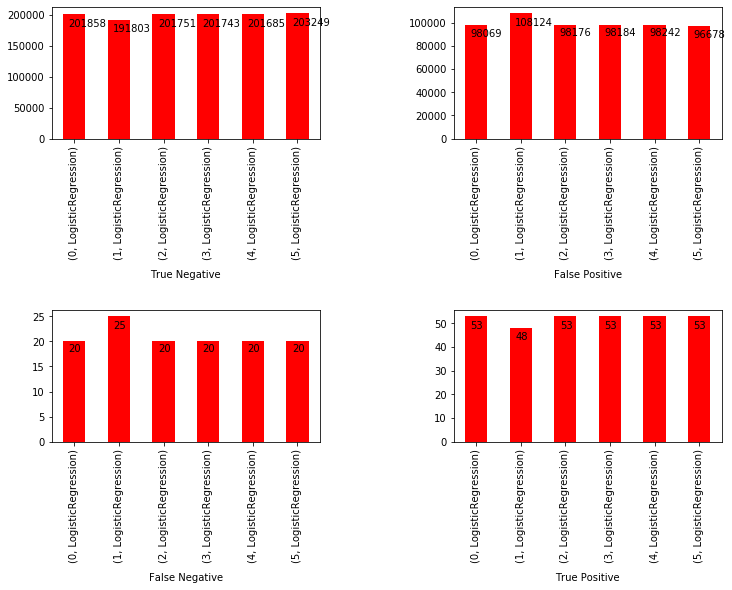

In [5]:
LR=LogisticRegression(class_weight ='balanced',random_state=random_state)
modeling.run_model(LR)
modeling.plot_comp(cmap_name='autumn',figsize=(12,8))